<a href="https://colab.research.google.com/github/miss-okyere/miss-okyere.github.io/blob/main/Exploring_Cyclistic_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S R
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

DATA_SOURCE_MAPPING = 'cyclistic-case-study:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F7481195%2F11901011%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20250523%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20250523T094103Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7243e704229fbbc8338da8c01c85a419eb60c7258927a132e2d94f9353d41744cc965b41ea63876161a816c333dce091679911d2c820bf88c7691033be7f61ef27b0d06a5db7a219e964e57db13bf5d3027cfadeb65ecd64760e2dc765cfaf97e0ee807029a6fb8b70e5faa26f85d3979a4f4599d1e859820d35617f8a3924bf4fafa8dbe4b4f06de0eb3ac930c62c0ba2c2cf77845015b7f1fdf50219ab61b6cbf909050e1463be5b00fe160c250b4629c84e901ab8ac7cd9a95761f6facdffe520c27e05bdc42407a2250f722b27ea3d07e6e2a9094c6446ec1a11b8fd00f6ec16759cebd4fdf31b59f83802ac82a488b9e0fe039f903362a2c82a33e5b3d8'

KAGGLE_INPUT_PATH = '/kaggle/input'
KAGGLE_WORKING_PATH = '/kaggle/working'

system(paste0('sudo umount ', '/kaggle/input'))
system(paste0('sudo rmdir ', '/kaggle/input'))
system(paste0('sudo mkdir -p -- ', KAGGLE_INPUT_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_INPUT_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_INPUT_PATH,' ',file.path('..', 'input')),
  intern=TRUE)

system(paste0('sudo mkdir -p -- ', KAGGLE_WORKING_PATH), intern=TRUE)
system(paste0('sudo chmod 777 ', KAGGLE_WORKING_PATH), intern=TRUE)
system(
  paste0('sudo ln -sfn ', KAGGLE_WORKING_PATH, ' ', file.path('..', 'working')),
  intern=TRUE)

data_source_mappings = strsplit(DATA_SOURCE_MAPPING, ',')[[1]]
for (data_source_mapping in data_source_mappings) {
    path_and_url = strsplit(data_source_mapping, ':')
    directory = path_and_url[[1]][1]
    download_url = URLdecode(path_and_url[[1]][2])
    filename = sub("\\?.+", "", download_url)
    destination_path = file.path(KAGGLE_INPUT_PATH, directory)
    print(paste0('Downloading and uncompressing: ', directory))
    if (endsWith(filename, '.zip')){
      temp = tempfile(fileext = '.zip')
      download.file(download_url, temp)
      unzip(temp, overwrite = TRUE, exdir = destination_path)
      unlink(temp)
    }
    else{
      temp = tempfile(fileext = '.tar')
      download.file(download_url, temp)
      untar(temp, exdir = destination_path)
      unlink(temp)
    }
    print(paste0('Downloaded and uncompressed: ', directory))
}

print(paste0('Data source import complete'))


character(0)

character(0)

character(0)

character(0)

character(0)

character(0)

[1] "Downloading and uncompressing: cyclistic-case-study"
[1] "Downloaded and uncompressed: cyclistic-case-study"
[1] "Data source import complete"


# 🚲 **Public Health Connection**

While this analysis primarily focuses on uncovering usage patterns in Cyclistic’s bike-share program, it also touches on a broader impact. Promoting cycling as a mode of transport contributes to healthier lifestyles, reduced pollution, and improved well-being, aligning with the **United Nations Sustainable Development Goal 3: Good Health and Well-being**.

📄 [Read the full SDG 3 impact documentation here](https://drive.google.com/file/d/1uia1uQjhZMEUg8L3Lvc2kxY5PuOZDBce/view?usp=sharing)


# Introduction

Cyclistic, a bike-share program in Chicago, has many casual riders who use the service occasionally but do not subscribe to annual memberships. Annual members are more profitable and tend to ride more regularly, but casual riders remain significantly higher in number. This presents missed opportunities for business growth and public health improvements.

# Scope

This project analyzes 12 months of trip data from Cyclistic’s bike-share program to understand how casual riders differ from annual members in ride frequency, duration, and timing. The findings will help design strategies to increase membership.

# Objectives

- Analyze and compare usage patterns between casual and annual riders.  
- Identify trends useful for targeted marketing strategies.  
- Recommend three realistic actions to convert casual users into regular members.

This approach supports promoting consistent bike use and aligns with sustainable transport and public health goals.


# Setup: Installing and Loading Necessary R Packages

In [2]:
# Install packages (if needed)
# install.packages("tidyverse")
# install.packages("lubridate")

# Load libraries
library(tidyverse)  # includes dplyr, ggplot2, readr, tidyr, etc.
library(lubridate)  # for date/time manipulation


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


This section loads the essential R packages used throughout the analysis.
tidyverse contains popular data manipulation and visualization packages such as dplyr and ggplot2.
lubridate is used for handling date and time data efficiently.

# Load and Inspect Data

In [3]:
# Example of reading data (update the path as necessary)
rides <- read_csv("/kaggle/input/cyclistic-case-study/Divvy_Trips_2020_SQL_R_Q1.csv")

# Inspect the first few rows
head(rides)

# View the dataset in a spreadsheet-like viewer (if your R environment supports it)
View(rides)

# Quick data structure overview
glimpse(rides)

# Show column names
colnames(rides)

New names:
• `` -> `...16`
• `` -> `...17`
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 426887 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, started_at, ended_at, start_station_name, ...
dbl  (7): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
lgl  (2): ...16, ...17
time (1): ride_length

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,...16,...17
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<dbl>,<lgl>,<lgl>
EACB19130B0CDA4A,docked_bike,1/21/2020 20:06,1/21/2020 20:14,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,41.9671,-87.6674,member,00:07:31,3,NA,NA
8FED874C809DC021,docked_bike,1/30/2020 14:22,1/30/2020 14:26,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.9616,-87.6660,41.9542,-87.6644,member,00:03:43,5,NA,NA
789F3C21E472CA96,docked_bike,1/9/2020 19:29,1/9/2020 19:32,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.9401,-87.6455,41.9402,-87.6530,member,00:02:51,5,NA,NA
C9A388DAC6ABF313,docked_bike,1/6/2020 16:17,1/6/2020 16:25,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.8846,-87.6319,41.8918,-87.6206,member,00:08:49,2,NA,NA
943BC3CBECCFD662,docked_bike,1/30/2020 8:37,1/30/2020 8:42,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.8856,-87.6418,41.8899,-87.6343,member,00:05:32,5,NA,NA
6D9C8A6938165C11,docked_bike,1/10/2020 12:33,1/10/2020 12:37,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member,00:04:49,6,NA,NA


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week,...16,...17
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<time>,<dbl>,<lgl>,<lgl>
EACB19130B0CDA4A,docked_bike,1/21/2020 20:06,1/21/2020 20:14,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,41.9671,-87.6674,member,00:07:31,3,NA,NA
8FED874C809DC021,docked_bike,1/30/2020 14:22,1/30/2020 14:26,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.9616,-87.6660,41.9542,-87.6644,member,00:03:43,5,NA,NA
789F3C21E472CA96,docked_bike,1/9/2020 19:29,1/9/2020 19:32,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.9401,-87.6455,41.9402,-87.6530,member,00:02:51,5,NA,NA
C9A388DAC6ABF313,docked_bike,1/6/2020 16:17,1/6/2020 16:25,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.8846,-87.6319,41.8918,-87.6206,member,00:08:49,2,NA,NA
943BC3CBECCFD662,docked_bike,1/30/2020 8:37,1/30/2020 8:42,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.8856,-87.6418,41.8899,-87.6343,member,00:05:32,5,NA,NA
6D9C8A6938165C11,docked_bike,1/10/2020 12:33,1/10/2020 12:37,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member,00:04:49,6,NA,NA
31EB9B8F406D4C82,docked_bike,1/10/2020 13:07,1/10/2020 13:12,Desplaines St & Randolph St,96,Wells St & Hubbard St,212,41.8846,-87.6446,41.8899,-87.6343,member,00:04:49,6,NA,NA
A2B24E3F9C9720E3,docked_bike,1/10/2020 7:24,1/10/2020 7:29,Desplaines St & Randolph St,96,Wells St & Hubbard St,212,41.8846,-87.6446,41.8899,-87.6343,member,00:04:57,6,NA,NA
5E3F01E1441730B7,docked_bike,1/31/2020 16:37,1/31/2020 16:42,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member,00:04:55,6,NA,NA


Rows: 426,887
Columns: 17
$ ride_id            <chr> "EACB19130B0CDA4A", "8FED874C809DC021", "789F3C21E4…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <chr> "1/21/2020 20:06", "1/30/2020 14:22", "1/9/2020 19:…
$ ended_at           <chr> "1/21/2020 20:14", "1/30/2020 14:26", "1/9/2020 19:…
$ start_station_name <chr> "Western Ave & Leland Ave", "Clark St & Montrose Av…
$ start_station_id   <dbl> 239, 234, 296, 51, 66, 212, 96, 96, 212, 38, 117, 1…
$ end_station_name   <chr> "Clark St & Leland Ave", "Southport Ave & Irving Pa…
$ end_station_id     <dbl> 326, 318, 117, 24, 212, 96, 212, 212, 96, 100, 632,…
$ start_lat          <dbl> 41.9665, 41.9616, 41.9401, 41.8846, 41.8856, 41.889…
$ start_lng          <dbl> -87.6884, -87.6660, -87.6455, -87.6319, -87.6418, -…
$ end_lat            <dbl> 41.9671, 41.9542, 41.9402, 41.8918, 41.8899, 41.884…
$ end_lng            <dbl> -87.6674, -87.6644, -87.6530, -87.6206, -87.6343, -…
$ member_casua

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"      "ride_length"        "day_of_week"       
[16] "...16"              "...17"

The Cyclistic bike-share data file was read into R using read_csv(). The dataset contains detailed information about each trip, including ride ID, bike type, start and end times, station names and locations, user type (member or casual), and ride duration. The first few rows were previewed with head(), the entire dataset was viewed interactively with View(), column names were examined using colnames(), and the structure and variable types were summarized using glimpse(). These steps were done to understand the data and identify any potential issues before proceeding with the analysis.

# Exploratory Data Analysis of Cyclistic Bike-Share Data
An exploratory data analysis was conducted on the Cyclistic bike-share dataset to identify trends and patterns in rider behavior. The dataset was first cleaned and prepared, including converting ride durations and organizing days of the week. Various visualizations were then created to explore how ride duration, frequency, and user type (member or casual) differed across time and categories. The results were intended to provide actionable insights for decision-making and strategy development.

The analysis proceeded in the following steps:

# 1. Data Preparation

* Converting ride_length to numeric minutes.
* Reordering day_of_week as a factor with proper labels and order.


In [4]:
rides$ride_length <- period_to_seconds(hms(rides$ride_length)) / 60

rides <- rides %>%
    mutate(
        day_of_week = factor(day_of_week,
                             levels = 1:7,
                             labels = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"),
                             ordered = TRUE)
    )

Descriptive statistics were initially derived to establish key metrics such as average ride duration and most common ride days. The ride_length column was converted from HH:MM:SS to minutes, and day_of_week was transformed from numeric to weekday names using R functions. These transformations facilitated clear analysis and visualization.

# 2. Ride Duration Distribution by Rider Type
Histogram of ride lengths split by member_casual.

Warning message:
“Removed 3348 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_bar()`).”


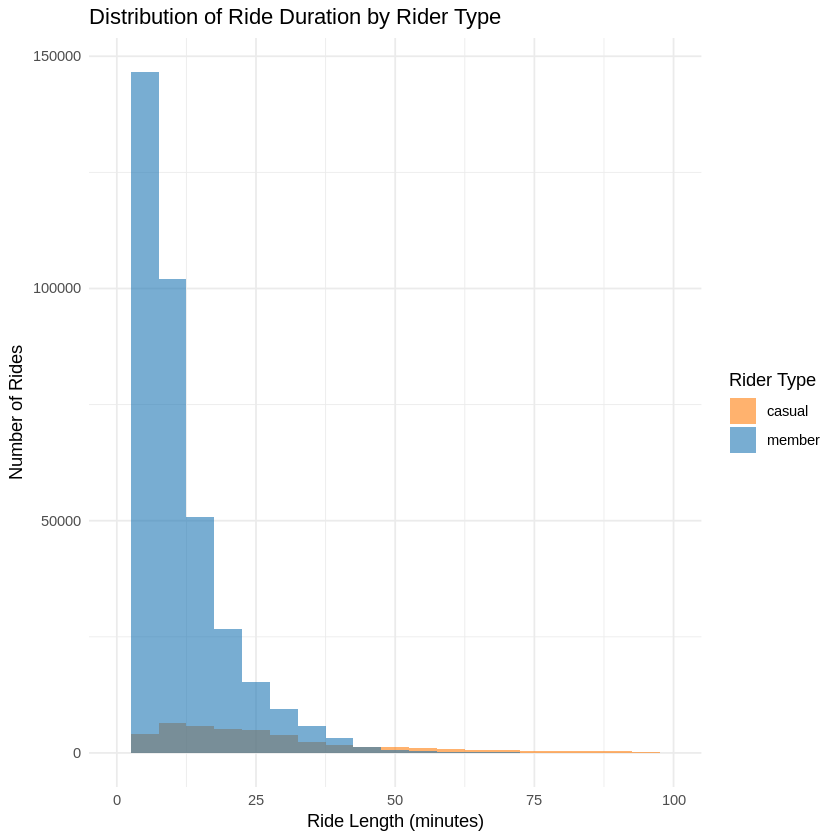

In [5]:
ggplot(rides, aes(x = ride_length, fill = member_casual)) +
    geom_histogram(binwidth = 5, position = "identity", alpha = 0.6) +
    xlim(0, 100) +
    labs(title = "Distribution of Ride Duration by Rider Type",
         x = "Ride Length (minutes)",
         y = "Number of Rides",
         fill = "Rider Type") +
    scale_fill_manual(values = c("member" = "#1f77b4", "casual" = "#ff7f0e")) +
    theme_minimal()

Histogram visualizations revealed distinct usage patterns: casual riders had significantly longer average ride durations (around 1–1.5 hours) compared to members (typically 10–15 minutes). This suggests that casual users use the bikes for leisure, while members ride for shorter, utilitarian purposes

# 3. Number of Rides by Day of Week and Rider Type
Bar plot showing count of rides per day, grouped by rider type.

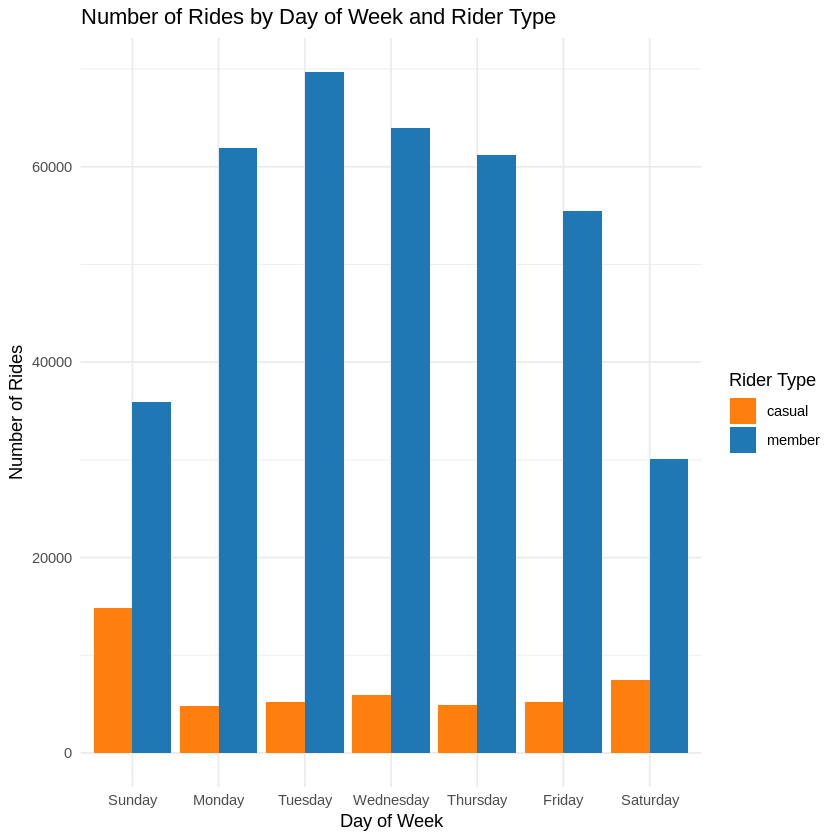

In [6]:
ggplot(rides, aes(x = day_of_week, fill = member_casual)) +
    geom_bar(position = "dodge") +
    labs(title = "Number of Rides by Day of Week and Rider Type",
         x = "Day of Week",
         y = "Number of Rides",
         fill = "Rider Type") +
    theme_minimal() +
    scale_fill_manual(values = c("member" = "#1f77b4", "casual" = "#ff7f0e"))

Bar charts and pivot tables indicated that members rode most frequently during weekdays, especially on Mondays, Tuesdays, and Wednesdays, consistent with commuting behavior. Casual riders, however, showed increased activity on weekends, particularly Sundays, aligning with recreational use.

# 4. Average Ride Length by Day of Week and Rider Type
Line plot showing how average ride length changes across the week for each rider type.

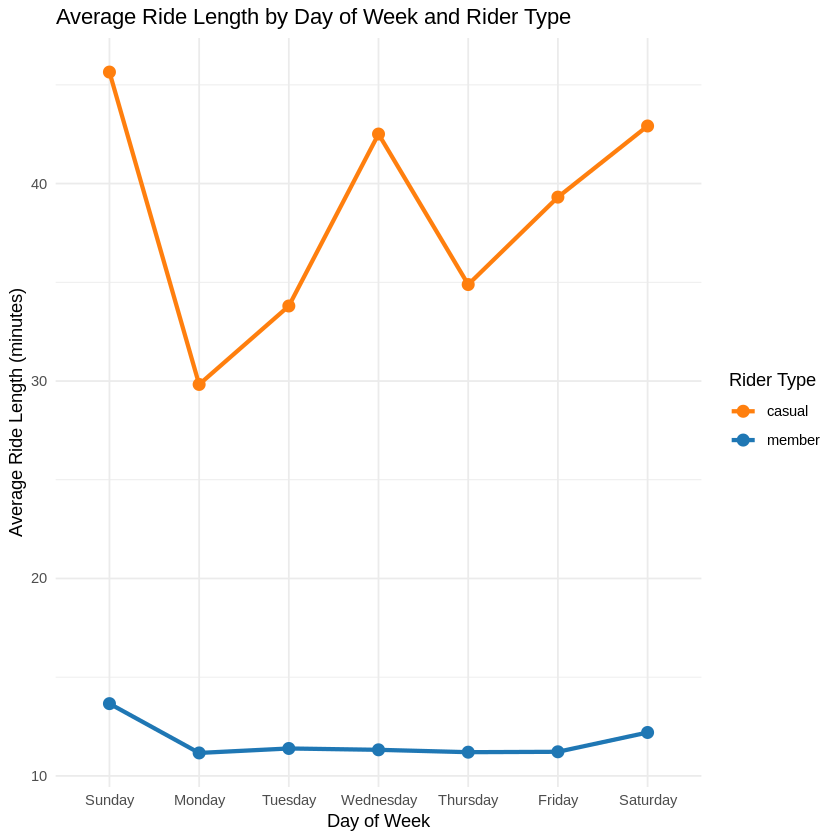

In [7]:
avg_ride_length <- rides %>%
    group_by(day_of_week, member_casual) %>%
    summarise(avg_ride_length = mean(ride_length, na.rm = TRUE), .groups = "drop")

my_colors <- c("member" = "#1f77b4", "casual" = "#ff7f0e")

ggplot(avg_ride_length, aes(x = day_of_week, y = avg_ride_length, color = member_casual, group = member_casual)) +
    geom_line(linewidth = 1.2) +  # updated as per warning
    geom_point(size = 3) +
    scale_color_manual(values = my_colors) +
    labs(title = "Average Ride Length by Day of Week and Rider Type",
         x = "Day of Week",
         y = "Average Ride Length (minutes)",
         color = "Rider Type") +
    theme_minimal()

Line plots demonstrated that casual riders had varying ride durations across the week (30–40 minutes on average, peaking on Sundays), whereas members maintained a steady duration (10–15 minutes). These trends confirm the contrasting nature of member and casual usage.

# 5. Ride Duration Summary by Rider Type
Boxplot comparing ride duration distributions for members vs casual riders.

Warning message:
“Removed 117 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


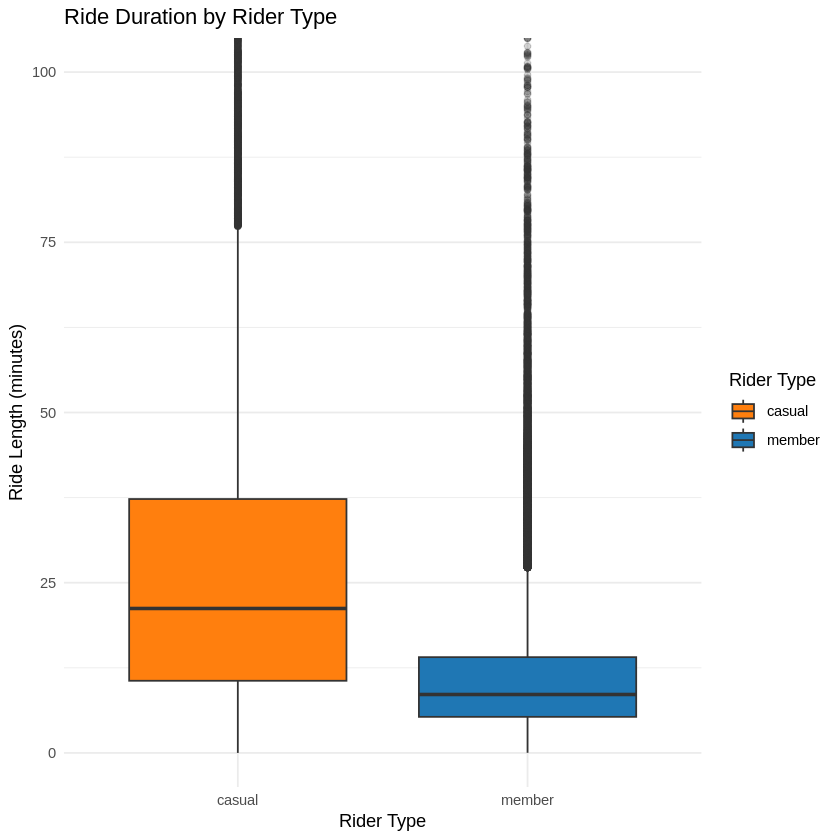

In [8]:
ggplot(rides, aes(x = member_casual, y = ride_length, fill = member_casual)) +
    geom_boxplot(outlier.alpha = 0.2) +
    scale_fill_manual(values = my_colors) +
    coord_cartesian(ylim = c(0, 100)) +
    labs(title = "Ride Duration by Rider Type",
         x = "Rider Type",
         y = "Ride Length (minutes)",
         fill = "Rider Type") +
    theme_minimal()

A boxplot comparing ride durations by rider type emphasized the disparity: casual riders showed high variability with medians between 50–75 minutes, while members showed consistency with medians around 10–15 minutes. This further highlights the difference in ride purpose and behavior between the two groups.

# Conclusion
The twelve-month exploration of Cyclistic’s trip records achieved the stated objectives. Usage patterns of casual and annual riders were analyzed in depth, revealing a clear behavioral divide: casual riders favor weekend outings of an hour or more, whereas members concentrate on short weekday journeys that rarely exceed fifteen minutes. These findings supplied the trends required for targeted marketing,evidence that leisure-centered, weekend promotions will resonate with casual users, while commuter incentives and loyalty rewards will reinforce weekday engagement among members.

Three concrete actions emerged from the analysis. First, weekend leisure campaigns, framed around scenic routes and group experiences, can speak directly to casual riders’ preferences and encourage membership upgrades. Second, commuter reward programs points, fare credits, or workplace partnerships can strengthen member retention and attract riders who value predictability and cost savings. Third, integrating health-tracking features such as “Cycle for 30” daily challenges transforms the service into a preventive health companion, aligning Cyclistic with Sustainable Development Goal 3 and differentiating the brand in a crowded mobility market.

By connecting rider behavior to health and sustainability outcomes, the study demonstrates that data-driven insight can do more than explain the past; it can shape strategies that expand membership, foster healthier communities, and support a cleaner urban environment. Cyclistic now holds a practical roadmap for converting occasional users into committed members, one that balances business growth with public health impact and positions the program as a model for active, sustainable transport.